<center><H1>Task 1<br>The Spark Foundation</center>
    
<br><br><H3>Ann Minna Babu

#### Importing necessory packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### Loading data

In [2]:
link='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(link)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Basic EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

From the above, its clear that there are no NULL values and hence we can interpret that the given dataset is clean.

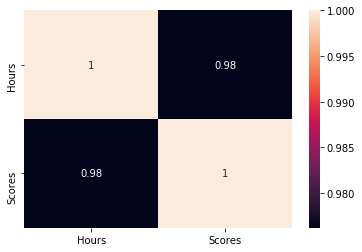

In [6]:
sns.heatmap(data.corr(),annot=True)

From the Heatmap, it is clear that there exists high positive corelation between the varibles.

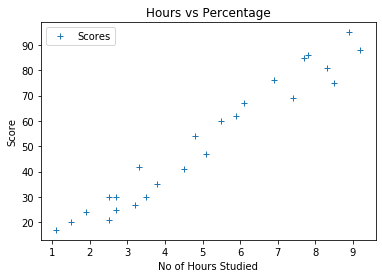

In [7]:
data.plot(x='Hours', y='Scores', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Score')  
plt.show()

From the above plot, it is clear that there is a linear relationship between Hours of study and Scores. Hence we can interpret that we can implement a regression model.

In [8]:
x = data.drop('Scores',axis = 1)
y = data['Scores']

In [9]:
X_train,X_test,Y_train,Y_test =  train_test_split(x,y,test_size=.20,random_state=2)

### Model Building

In [10]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
print("Intercept value = ",lr.intercept_)
print("Coefficient value = ",lr.coef_)

Intercept value =  1.5079104828268726
Coefficient value =  [9.94061514]


From the above ,the model obtained is:
STUDY= 1.5079104828268726 + 9.94061514 * HOURS OF STUDY

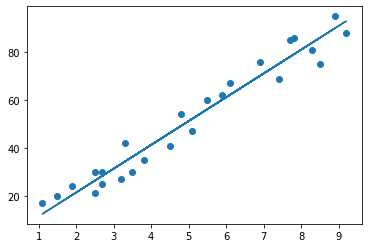

In [11]:
line = lr.coef_*x+lr.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

By Fitting Line in the above graph ,we see hat there is an increasing trend,Hence it can be concluded that Scores can be increased with increase in studying 

### Prediction for test data

In [12]:
y_pred = lr.predict(X_test)

In [13]:
df= pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


In [14]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.877039354964484


### Predicting the score of student when he/she studies for 9.25 hours

In [15]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.45860055685799


So,the predicted score that a student will score is 93.45% ,if  9 hours and 25 minutes is spend studying.